In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
import sklearn

In [2]:
X = pd.read_csv("Logistic_X_Train.csv")
Y = pd.read_csv("Logistic_Y_Train.csv")

In [20]:
print(X.shape)
print(Y.shape)

(3000, 3)
(3000, 1)


In [23]:
X_train = X.values
Y_train = Y.values
print(X_train.shape)
print(Y_train.shape)

X_test = pd.read_csv("Logistic_X_Test.csv").values

(3000, 3)
(3000, 1)


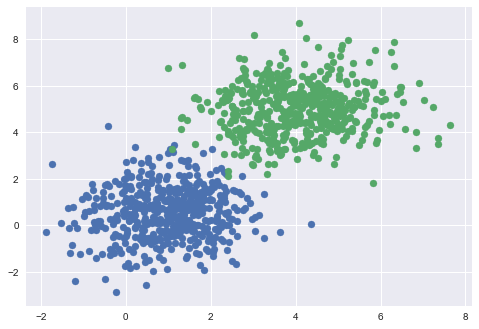

In [5]:
mean01 = np.array([1,0.5])
cov01 = np.array([[1,0.1],[0.1,1.2]])

mean02 = np.array([4,5])
cov02 = np.array([[1.21,0.1],[0.1,1.3]])

dist01 = np.random.multivariate_normal(mean01,cov01,500)
dist02 = np.random.multivariate_normal(mean02,cov02,500)

plt.style.use("seaborn")

plt.scatter(dist01[:,0],dist01[:,1])
plt.scatter(dist02[:,0],dist02[:,1])

plt.show()

In [7]:
X= np.vstack((dist01, dist02))

In [8]:
X.shape

(1000, 2)

In [13]:
Y = np.vstack((np.zeros((500,1)) , np.ones((500,1))))

In [14]:
Y.shape

(1000, 1)

In [35]:
data = np.hstack((X, Y))

In [38]:
np.random.shuffle(data)

In [40]:
X = data[: , :-1]
Y = data[ : , -1]

In [41]:
X.shape, Y.shape

((1000, 2), (1000,))

In [42]:
def hypothesis(x,w,b):
    """This function accepts input vector x ,input weight w and the bias"""
    h = np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1/(1 + np.exp(-1*z))

def error(y_true,X,w,b):
    m = X.shape[0]
    err = 0.0
    for i in range(m):

        hx = hypothesis(X[i],w,b)
            
        err += (y_true[i] * np.log2(hx)) + (1 - y_true[i]) * np.log2(1-hx)
        
    return -err/m

In [43]:
def get_grads(y_true,X,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],w,b)
        grad_w = grad_w + (y_true[i] - hx) * X[i].T
        grad_b += (y_true[i] - hx)
        
    grad_w /= m
    grad_b /= m
    
    return grad_w, grad_b


def grad_descent(X,y_true,w,b,learningRate=0.1):
    err = error(y_true,X,w,b)
    grad_w, grad_b = get_grads(y_true,X,w,b)
    
    w = w + learningRate * grad_w
    b = b + learningRate * grad_b
    
    return err,w,b

def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if confidence >= 0.5:
        return 1
    else:
        return 0
    
    
def get_acc(x_test,y_test,w,b):
    y_pred = []
    for i in range(y_test.shape[0]):
        p = predict(x_test[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    return float((y_pred==y_test).sum()/y_test.shape[0])

In [44]:
loss = []
acc = []

W = 2 * np.random.random((X.shape[1],))
b = 5 * np.random.random()
print(W.shape)

(2,)


In [45]:
for i in range(300):
    l,w,b = grad_descent(X,Y,W,b,learningRate=0.5)
    acc.append(get_acc(X,Y,w,b))
    loss.append(l)

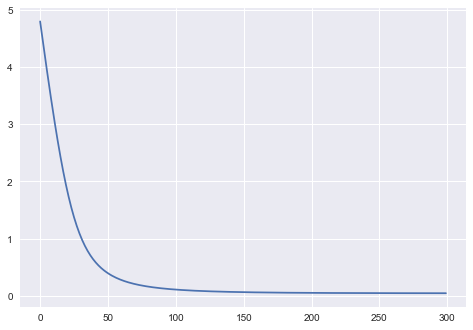

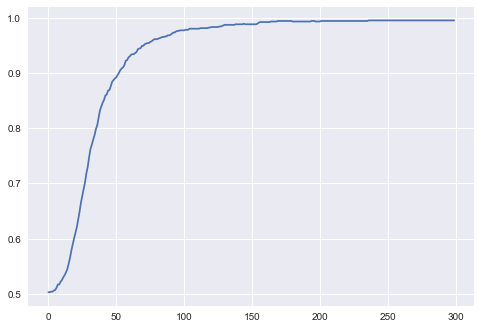

In [49]:
plt.plot(loss)
plt.show()
plt.plot(acc)
plt.show()